In [1]:
import pandas as pd
import numpy as np
import io
import requests

In [2]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
s=requests.get(url).content
users =pd.read_csv(io.StringIO(s.decode('utf-8')),delimiter="|")

In [3]:
avg = users.groupby('occupation').mean()
avgAge = avg['age']
avgAge

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
users['maleUsers'] = np.where( users['gender'] =='M' ,1,0)
maleRatio = users.groupby('occupation').maleUsers.sum()/users.groupby('occupation').gender.count()
print (maleRatio.sort_values(ascending = False))

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [5]:
occupGroup = users.groupby('occupation')['age']
print("Minimum Age per",occupGroup.min(),"maximum age per ",occupGroup.max())

Minimum Age per occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64 maximum age per  occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [6]:
genderOccupation = users.groupby(['occupation','gender'])
genderOccupation.age.mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [7]:
#Percentage of gender of each occupation

genderOccupation = users.groupby(['occupation','gender'])

genderPercentage = 100*genderOccupation.gender.count()/users.groupby('occupation').gender.count()
genderPercentage

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

**Question 2**

In [8]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
s = requests.get(url).content
euro12 = pd.read_csv(io.StringIO(s.decode('utf-8')),delimiter=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [9]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [10]:
euro12['Team'].value_counts().sum()

16

In [11]:
list(euro12)

['Team',
 'Goals',
 'Shots on target',
 'Shots off target',
 'Shooting Accuracy',
 '% Goals-to-shots',
 'Total shots (inc. Blocked)',
 'Hit Woodwork',
 'Penalty goals',
 'Penalties not scored',
 'Headed goals',
 'Passes',
 'Passes completed',
 'Passing Accuracy',
 'Touches',
 'Crosses',
 'Dribbles',
 'Corners Taken',
 'Tackles',
 'Clearances',
 'Interceptions',
 'Clearances off line',
 'Clean Sheets',
 'Blocks',
 'Goals conceded',
 'Saves made',
 'Saves-to-shots ratio',
 'Fouls Won',
 'Fouls Conceded',
 'Offsides',
 'Yellow Cards',
 'Red Cards',
 'Subs on',
 'Subs off',
 'Players Used']

In [12]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [13]:
discipline.sort_values(by = ['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [14]:
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [15]:
euro12[euro12['Goals'] > 6 ][['Team','Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


In [16]:
euro12[euro12['Team'].map(lambda x: x.startswith('G'))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [17]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [18]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [19]:
euro12[euro12['Team'].isin(['Russia','England', 'Italy'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### **Question 3**

In [20]:
import random
arr = []
arr1 = []
arr2 = []

for i in range(0,100):
  n = random.randrange(1,4)
  arr.append(n)
data1 = np.array(arr)

for i in range(0,100):
  n = random.randrange(1,3)
  arr1.append(n)
data2 = np.array(arr)

for i in range(0,100):
  n = random.randrange(10000,30000)
  arr2.append(n)
data3 = np.array(arr)

data = {"bedrs": data1, "bathrs": data2, "price_sqr_meter": data3}

df = pd.DataFrame(data)

df

,bedrs,bathrs,price_sqr_meter
0,2,2,2
1,2,2,2
2,2,2,2
3,2,2,2
4,2,2,2
...,...,...,...
95,2,2,2
96,3,3,3
97,3,3,3
98,3,3,3


In [21]:
allThreeColumn = np.concatenate((data1, data2 , data3))
bigcolumn = pd.Series(allThreeColumn)
df["bigcolumn"] = bigcolumn
df

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,2,2,2,2
1,2,2,2,2
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2
...,...,...,...,...
95,2,2,2,2
96,3,3,3,3
97,3,3,3,3
98,3,3,3,3


Yes it is true it is going till 99 only

### **Question 6**

In [23]:
from google.colab import files
files.upload()

Saving usmarriage.csv to usmarriage.csv


{'usmarriage.csv': b'Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000\r1867,357000,10000,36970000,9.7,0.3\r1868,345000,10000,37885000,9.1,0.3\r1869,348000,11000,38870000,9,0.3\r1870,352000,11000,39905000,8.8,0.3\r1871,359000,12000,41010000,8.8,0.3\r1872,378000,12000,42066000,9,0.3\r1873,386000,13000,43225000,8.9,0.3\r1874,385000,14000,44429000,8.7,0.3\r1875,409000,14000,45492000,9,0.3\r1876,405000,15000,46459000,8.7,0.3\r1877,411000,16000,47400000,8.7,0.3\r1878,423000,16000,48319000,8.8,0.3\r1879,438000,17000,49264000,8.9,0.3\r1880,453000,20000,50262000,9,0.4\r1881,464000,21000,51466000,9,0.4\r1882,484000,22000,52893000,9.2,0.4\r1883,501000,23000,54435000,9.2,0.4\r1884,485000,23000,55826000,8.7,0.4\r1885,507000,23000,57128000,8.9,0.4\r1886,534000,26000,58258000,9.2,0.4\r1887,513000,28000,59357000,8.6,0.5\r1888,535000,29000,60614000,8.8,0.5\r1889,563000,32000,61893000,9.1,0.5\r1890,570000,33000,63056000,9,0.5\r1891,592000,36000,64432000,9.2,0.6\r1892,601000,37000,

In [ ]:
df_items = pd.read_csv("usmarriage.csv")
df_items.head()

In [26]:
import matplotlib.pyplot as plt

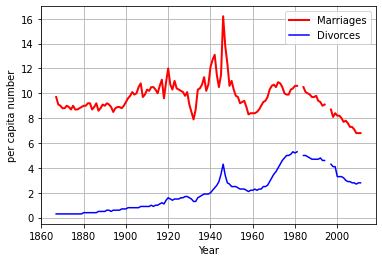

In [27]:

lines = plt.plot(df_items['Year'],df_items['Marriages_per_1000'],df_items['Year'],df_items['Divorces_per_1000'])
plt.ylabel("per capita number")
plt.xlabel('Year')
plt.rcParams["figure.figsize"] = [13.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.setp(lines[0], color='r', linewidth=2.0 ,label="Marriages")
plt.setp(lines[1], color='b', label="Divorces")
plt.legend(loc='upper right')
plt.grid()

### **Question 7**

In [28]:
import seaborn as sns


In [29]:
df_A = df_items[df_items['Year'] >= 1900]
df_First = df_A[df_A['Year'] <= 1950]
marriageFirst = (df_First['Marriages'].sum())/(df_First['Population'].sum())*1000

DivorceFirst = (df_First['Divorces'].sum())/(df_First['Population'].sum())*1000

df_C = df_A[df_items['Year'] >= 1950]
df_Third = df_C[df_A['Year'] <= 2000]
marriageSecond = (df_Third['Marriages'].sum())/(df_Third['Population'].sum())*1000

DivorceSecond = (df_Third['Divorces'].sum())/(df_Third['Population'].sum())*1000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


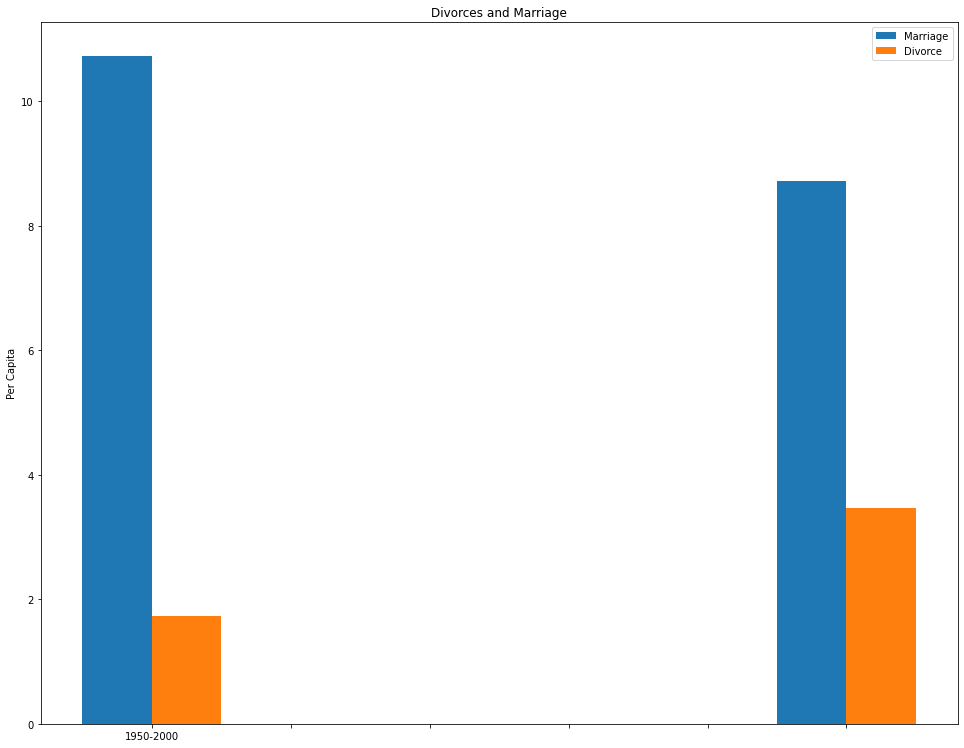

In [30]:
labels = ['1900-1950', '1950-2000']
Marriages = [marriageFirst,marriageSecond]
Divorces = [DivorceFirst,DivorceSecond]

width = 0.1

x = np.arange(len(labels))

fig, ax = plt.subplots()
marr = ax.bar(x - width/2, Marriages, width, label='Marriage')
div = ax.bar(x + width/2, Divorces, width, label='Divorce')

ax.set_ylabel('Per Capita')
ax.set_title('Divorces and Marriage')
ax.set_xticklabels(("1900-1950", "1950-2000"))
ax.legend()

fig.tight_layout()

plt.show()

### **Question 9**

In [31]:
from google.colab import files
files.upload()

Saving roman.csv to roman.csv


{'roman.csv': b'Emperor,Length_of_Reign,Cause_of_Death\r\nAugustus,40.58,Possibly assassinated\r\nTiberius,22.5,Possibly assassinated\r\nCaligula,4.83,Assassinated\r\nClaudius,13.75,Possibly assassinated\r\nNero,13.67,Suicide\r\nGalba,0.58,Assassinated\r\nOtho,0.25,Suicide\r\nVitellius,0.67,Assassinated\r\nVespasian,10,Natural causes\r\nTitus,3.25,Illness\r\nDomitian,15,Assassinated\r\nNerva,1.33,Natural causes\r\nTrajan,19.58,Natural causes\r\nHadrian,21,Natural causes\r\nAntoninus Pius,22.58,Natural causes\r\nMarcus Aurelius,19,Illness\r\nLucius Verus,8,Illness\r\nCommodus,15,Assassinated\r\nPertinax,0.25,Assassinated\r\nDidius Julianus,0.16,Executed\r\nSeptimius Severus,17.83,Natural causes\r\nCaracalla,19,Assassinated\r\nGeta,3,Assassinated\r\nMacrinus,1.16,Executed\r\nElagabalus,3.75,Assassinated\r\nSeverus Alexander,13,Assassinated\r\nMaximinus I,3.25,Assassinated\r\nGordian I,0.06,Suicide\r\nGordian II,0.06,Killed in battle\r\nPupienus,0.25,Assassinated\r\nBalbinus,0.25,Assassin

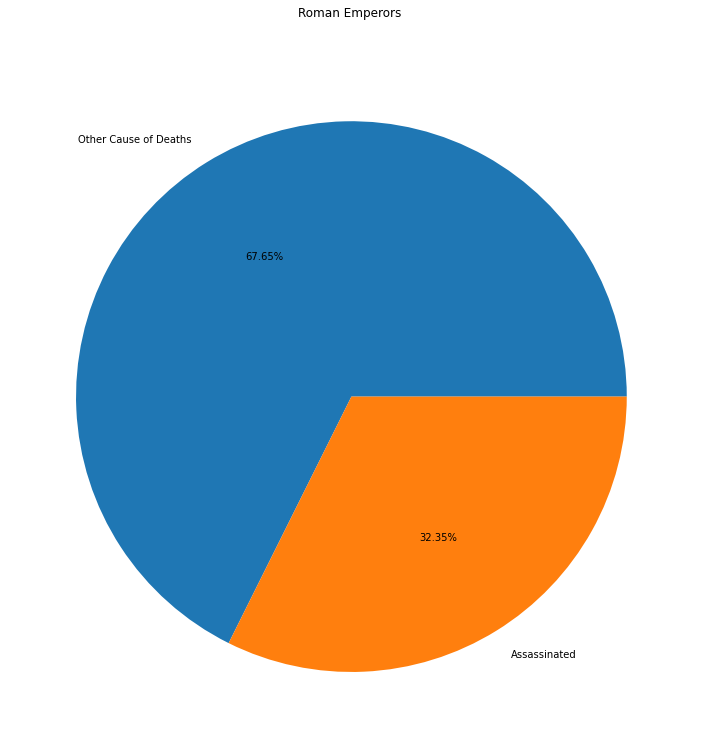

In [33]:
romanData= pd.read_csv('roman.csv')
romanData.head()

lowerData= romanData.where(romanData.Cause_of_Death=="Assassinated").Cause_of_Death.count()

remaining= romanData.Cause_of_Death.count()-lowerData

label=["Other Cause of Deaths","Assassinated"]
plt.pie([remaining,lowerData],labels=label,autopct='%.2f%%')
plt.title("Roman Emperors \n\n")


plt.show()

### **Question 10**

In [34]:
from google.colab import files
files.upload()

Saving arcade-revenue-vs-cs-doctorates.csv to arcade-revenue-vs-cs-doctorates.csv


{'arcade-revenue-vs-cs-doctorates.csv': b'Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)\r2000,1.196,861\r2001,1.176,830\r2002,1.269,809\r2003,1.24,867\r2004,1.307,948\r2005,1.435,1129\r2006,1.601,1453\r2007,1.654,1656\r2008,1.803,1787\r2009,1.734,1611'}

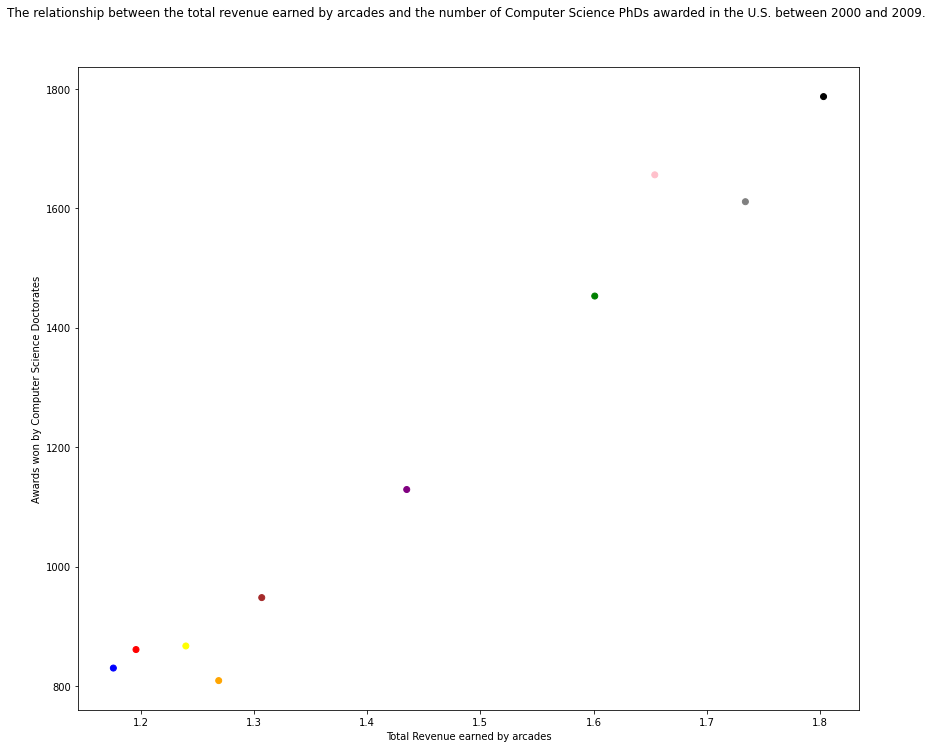

In [36]:
revenueData= pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
Years=revenueData.Year
Arcade= revenueData['Total Arcade Revenue (billions)']
PhD=revenueData['Computer Science Doctorates Awarded (US)']


colors=["Red","Blue","Orange","Yellow","Brown","Purple","Green","Pink","Black","Gray"]
plt.scatter(Arcade,PhD,color=colors)

plt.xlabel("Total Revenue earned by arcades")
plt.ylabel("Awards won by Computer Science Doctorates")
plt.title("The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. \n\n\n")
plt.show()